In [1]:
## Charlie Korsak: Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [194]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

df = pd.read_csv('titanic.csv')
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [190]:
num_passengers = df.shape[0]
print(f"{num_passengers}")

891


In [184]:
male_pct = (df['Sex'].value_counts(normalize=True)[1]) * 100
print(f"{male_pct}")

64.75869809203144


In [182]:
survivor_pct = (df['Survived'].value_counts(normalize=True)[1]) * 100
print(f"{survivor_pct}")

38.38383838383838


Your written answer:

 - <891>
 - <64.76%>
 - <38.38%>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [218]:
female_passengers = df[df['Sex'] == 0]
pct_females_survived = female_passengers['Survived'].mean() * 100

print(f"{pct_females_survived}")

74.20382165605095


In [220]:
male_passengers = df[df['Sex'] == 1]
pct_males_survived = male_passengers['Survived'].mean()*100
print(f"{pct_males_survived}")

18.890814558058924


Your written answer:

 - <74.20%>
 - <18.89%>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [234]:
result = df.groupby('Pclass').agg(total_tickets=('PassengerId','count'), survivors=('Survived', 'sum'))


total_passengers = len(df)  
result['pct_of_total_tickets'] = (result['total_tickets'] / total_passengers) * 100


result['survivor_pct'] = (result['survivors'] / result['total_tickets']) * 100


print(result[['pct_of_total_tickets', 'survivor_pct']])

        pct_of_total_tickets  survivor_pct
Pclass                                    
1                  24.242424     62.962963
2                  20.650954     47.282609
3                  55.106622     24.236253


Your written answer:

 - Class 1 
    - 24.24
    - 62.96
- Class 2 
    - 20.65
    - 47.28
- Class 3
    - 55.11
    - 24.23


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [263]:
survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]

non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

print("Survivors")
print(survivors.head())

print("Non-Survivors")
print(non_survivors.head())

Survivors
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0
Non-Survivors
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


In [267]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

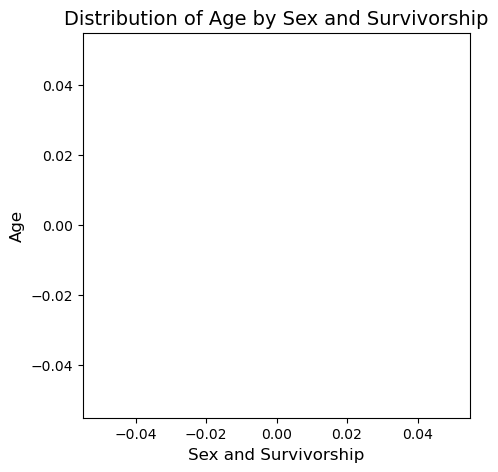

In [269]:
male_survivors = df[(df['Sex'] == '1') & (df['Survived'] == 1)]['Age']
female_survivors = df[(df['Sex'] == '0') & (df['Survived'] == 1)]['Age']
male_unlucky = df[(df['Sex'] == '1') & (df['Survived'] == 0)]['Age']
female_unlucky = df[(df['Sex'] == '0') & (df['Survived'] == 0)]['Age']
plt.figure(figsize=(5, 5))
plt.bar(male_survivors, female_survivors, male_unlucky, female_unlucky, alpha=.5)

plt.xlabel('Sex and Survivorship', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Distribution of Age by Sex and Survivorship', fontsize=14)

plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [271]:
features = ['Age' , 'Sex']
label = ['Survived']

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.2)

In [280]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y

NameError: name 'y' is not defined

In [282]:
Xs_train.shape

np.sqrt(712)

26.68332812825267

In [286]:
knn_clf = KNeighborsClassifier(n_neighbors = 25)
knn_clf.fit(Xs_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [300]:
from ModelPlot.py import plotDecisionBoundary

ModuleNotFoundError: No module named 'ModelPlot'

NameError: name 'plotDecisionBoundary' is not defined

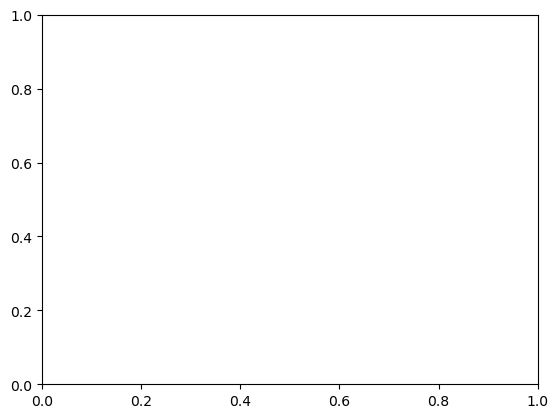

In [296]:
fig, ax = plt.subplots(1,1)

plotDecisionBoundary
ax.set_xlabel('age')
ax.set_ylabel('sex')
plt.show()

In [292]:
from sklearn.metrics import ConfusionMatrixDisplay

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

ConfusionMatrixDisplay.from_prediction(ys_train, y_knn_train, display_labels = ['Did not', 'Survived'])

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_prediction'

NameError: name 'ys_test' is not defined

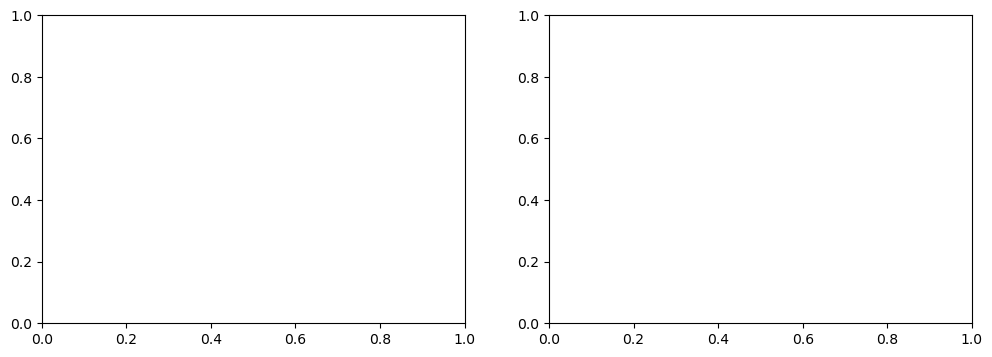

In [294]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth =4)
tree_clf.fit(X_train, y_train)

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize =(12,4))
ConfusionMatrixDisplay.from_predictions(ys_test, y_knn_test,
                                        normalize = 'true',
                                        display_labels = ['Did not','Survived'],
                                        ax = ax[0])
ConfusionMatrixDisplay.from_predictions(ys_train, y_knn_train,
                                        normalize = 'true',
                                        display_labels = ['Did not','Survived'],
                                        ax = ax[1])
ax[0].set_title= 'Training'
ax[1].set_title = 'Test'
plt.show()

In [ ]:
plot_tree(tree_clf, class_names = ['Drowned' , 'Survived'], feature_names = features, 
          filled = True,
          

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

In [ ]:
I honestly began to run out of time so was unable to fully compare the model performance on test data verus the training data.
In general I know that a model will likely perform better with the training as we saw with the pokemon activity. 
The model is trained on this data and should perform better than it would using unseen data. 

The intention for model was supposed to be a decision tree type, however I got stuck after the 
notes I tried to take in class. Overall after creating the two new data frames for question four
it was a bit of a struggle and time crunch. 